# 3.ニューラルネットワーク

In [1]:
import numpy as np
import matplotlib.pylab as plt

## 3.2 活性化関数
ニューラルネットワークの出口になる部分の関数。全勝で扱ったパーセプトロンでは、入力が閾値を超えると発火して1を返す仕組みだったが、こちらはステップファンクション（階段関数）と呼ばれる。活性化関数を階段関数から別の関数に変えることがニューラルネットワークの第一歩となる。

### Step funciton（階段関数）
入力（ｘ）が０を超えるまでは出力（ｙ）も０のままだが、ｘが０を超えた瞬間に１を返すようになる（発火）。グラフの形から階段関数と呼ばれる。

In [2]:
def step_function(x):
    #引数の配列をboolに変える
    y = x > 0
    # boolを0/1に変える
    return y.astype(int)

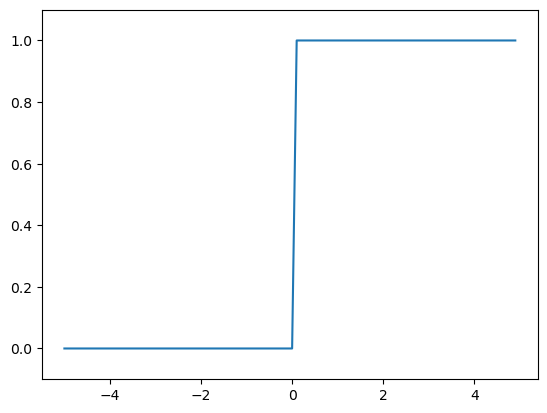

In [3]:
# ステップ関数を描画する
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid function
階段関数をもうすこし滑らかにしたような形の関数。階段関数と同様に入力値が充分に大きいと1に近い数字を返すが、入力値に応じて0から1の間の連続値を返すのが階段関数との違い。

In [4]:
# ブロードキャストの機能のおかげでこの実装でも配列を処理できる。便利！！
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [5]:
# 上記の例
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

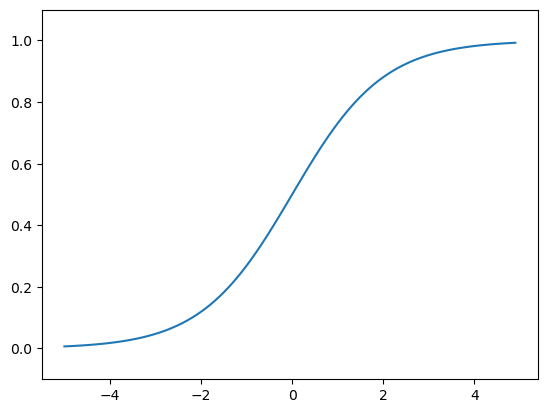

In [6]:
# 描画してみる
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU function
最近よく使われているらしい活性化関数。入力値が0までは0を返し0以上であれば入力値をそのまま返す。最近人気の背景は、誤差逆伝播の際の微分と相性がいい（勾配消失問題を抑制する）ということらしい。

In [7]:
def relu(x):
    return np.maximum(0, x)

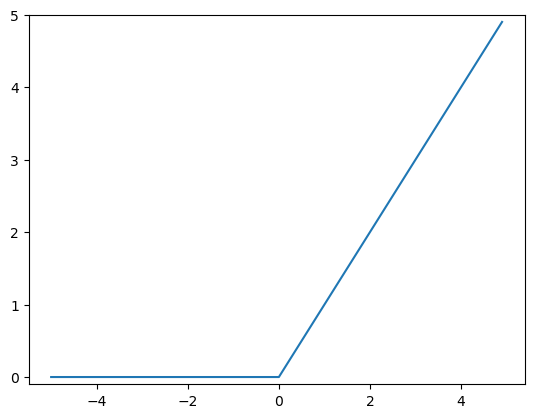

In [8]:
# （テキストにはコード無いけど）描画してみる
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.0)
plt.show()

## 3.3 多次元配列の計算

### 行列の積（dot product）
行列（から続く線形代数）がまるでわからんが、dot product（内積）については[このページ](https://mathwords.net/gyouretsuseki)がググった中ではシンプルだった。numpyの関数だとnp.dot()がdot productの計算をする関数になる。

In [9]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [10]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

通常の掛け算と異なりAとBを入れ替えると計算結果も変わる。

In [11]:
np.dot(B, A)

array([[23, 34],
       [31, 46]])

In [12]:
# 2 * 2以外の形状
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
print("Aの形状:　", A.shape)
print("Bの形状： ", B.shape)

Aの形状:　 (2, 3)
Bの形状：  (4, 2)


ドット積では一つ目の引数の配列の1次元目と、二つ目の引数の配列の0次元目を揃える必要がある。

In [13]:
np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51],
       [39, 54, 69]])

In [14]:
# これだとエラー
np.dot(A, B)

ValueError: shapes (2,3) and (4,2) not aligned: 3 (dim 1) != 4 (dim 0)

## 3.4 3層ニューラルネットの実装
dot productをつかって3層のニューラルネットを使う。

###　第一層

In [15]:
## 入力値
X = np.array([1.0, 0.5])

## 重み
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
## バイアス
B1 = np.array([0.1, 0.2, 0.3])

In [16]:
print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [17]:
# 第一層の重み付き和 = 入力値 * 重み + バイアス
# （形状に注意）XとW1のドット積の結果は(3,)の形状の配列になり、B1の形状とちゃんとマッチする。
A1 = np.dot(X, W1) + B1

# 活性化関数（ここではシグモイド関数）を重み付き和に与えて第一層の出力にする
Z1 = sigmoid(A1)

In [18]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

### 第二層

In [19]:
# 第二層の重み
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
# 第二層のバイアス
B2 = np.array([0.1, 0.2])

In [20]:
#形状を確認しておく。
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [21]:
# 2層目のネットワーク
# np.dot(Z1, W2)は(2,)の配列を返す。
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

### 出力層（第三層）

In [22]:
# 恒等関数、回帰問題ではよく使われる関数
def identity_function(x):
    return x

#第三層の重みとバイアス。
#第二層の出力が(2,)の配列なのでそれを計算できる形状にする。
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [23]:
# ネットワークの計算
A3 = np.dot(Z2, W3) + B3

# 出力層ではこれまでと違う活性化関数を使う。
# ここでは回帰問題でよく使われる恒等関数を使う。
# 豪華な名前がついているが何もせず入力値をそのまま返す関数。
Y = identity_function(A3)

### 実装のまとめ
ここまで一層ずつ見てきたものを関数にして一度に計算するニューラルネットを実装する。

In [24]:
def init_network():
    # 重みとバイアスの値の初期値
    network = {}
    
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [25]:
# 実際に計算してみる
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 出力層の設計

### ソフトマックス関数
出力層の活性化関数としてソフトマックス関数を使うことがある。分類のタスクで主に使われる。
ソフトマックス関数は出力の総和が1となるので出力を確率として見做すことができる。問題に対して統計的な対応ができるようになる。もう一つの特徴としては入力値の大小の順位が変わることは無いので、学習時にのみ重みの最適化のために（？）出力層にソフトマックス関数を使い、実際に分類を行う際には出力層のソフトマックス関数は省くことが多い。modellingの際のパラメーター推定にのみ用いて、モデルが出来たら計算資源を有効に使うためにも省いてしまうということ。

In [40]:
# この配列をソフトマックス関数にかける
a = np.array([0.3, 2.9, 4.0])

In [41]:
# 分母の計算
exp_a = np.exp(a)
print(exp_a) # 指数関数に入力値を与える

sum_exp_a = np.sum(exp_a) # 全てを合計する
print(sum_exp_a)

# sum_exp_aを使って割り算をする
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [42]:
# 関数として実装する
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

上記の関数だと以下のように指数関数がオーバーフローする可能性がある。

In [43]:
a = np.array([1010, 1000, 990])
np.exp(a)

C:\Users\JPrepSaitoJuku\AppData\Local\Temp\ipykernel_12548\1785970911.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a)


array([inf, inf, inf])

そこで、指数関数の計算(np.exp())をする前に入力値から定数を引くことで入力値を小さくする。  
全ての入力値から同じだけ定数を引くのでソフトマックス関数の計算結果は変わらない。

In [44]:
def softmax(a):
    c = np.max(a) #入力値の配列の中で一番大きいものを定数Cにする。
    exp_a = np.exp(a - c) #オーバーフロー対策に全ての入寮力定数Ｃを引く
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [45]:
# ちゃんとうごく！
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 出力層のニューロンの數について
先にforward()の関数で実装した3層のネットワークでは、返り値(y)は(2,)の形で、つまり出力層のニューロンの数が2つだったが、タスクによって出力層のニューロンの数を設定していく必要がある。分類のタスクでは、分類したい種類の數に合わせてニューロンを作り、ソフトマックス関数で出力していく。3クラスの分類では出力層のニューロン3つで、3つのどれかになる確率が合計で1になるようにソフトマックス関数で出力するイメージ。